In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
table  = pd.read_csv("combined.csv")
table.head()

,index,start,Charge Duration,User
0,0.0,3/27/2013 20:36,0 days 04:53:57,1
1,1.0,3/28/2013 21:20,0 days 01:00:06,1
2,2.0,3/28/2013 23:44,0 days 02:03:12,1
3,3.0,3/29/2013 18:41,0 days 02:32:17,1
4,4.0,3/29/2013 22:05,0 days 03:42:18,1


In [3]:
x = table['Charge Duration']

In [4]:
time_in_sec= []
for i in range(3318):
    time_in_sec.append(x[i][7:15])
    

In [5]:
time_in_sec[0]

'04:53:57'

In [6]:
import datetime
import time
charge_time = []
j = 0
for j in range(3318):
    sec = time.strptime(time_in_sec[j],'%H:%M:%S')
    charge_time.append(datetime.timedelta(hours=sec.tm_hour,minutes=sec.tm_min,seconds=sec.tm_sec).total_seconds())

In [7]:
total_charge_time =(sum(charge_time)/60)/60
print(total_charge_time)

13108.004166666668


In [8]:
#total_charge_time is in hours
#1 hour of charging produces 3.466kg CO2
co2_from_charging=total_charge_time*3.466
print(co2_from_charging)

45432.342441666675


In [9]:
time_in_sec

['04:53:57',
 '01:00:06',
 '02:03:12',
 '02:32:17',
 '03:42:18',
 '03:17:00',
 '02:01:38',
 '03:59:44',
 '01:11:12',
 '04:27:36',
 '01:14:11',
 '02:08:52',
 '06:02:01',
 '01:13:12',
 '03:00:41',
 '01:57:03',
 '01:20:47',
 '01:06:56',
 '04:17:20',
 '01:14:23',
 '02:59:02',
 '04:08:46',
 '01:00:58',
 '03:40:27',
 '03:28:29',
 '01:03:20',
 '06:36:31',
 '02:50:07',
 '01:55:29',
 '01:03:56',
 '01:36:26',
 '02:26:32',
 '01:23:59',
 '03:09:16',
 '01:05:20',
 '01:24:02',
 '01:00:37',
 '08:49:26',
 '01:01:11',
 '03:55:29',
 '01:02:44',
 '01:22:05',
 '01:45:22',
 '02:55:34',
 '01:38:00',
 '01:50:10',
 '02:27:23',
 '01:37:47',
 '01:01:14',
 '02:09:30',
 '03:49:00',
 '01:18:58',
 '01:25:53',
 '01:30:14',
 '01:39:34',
 '01:50:02',
 '01:31:43',
 '07:42:56',
 '02:44:27',
 '02:24:02',
 '01:07:15',
 '03:06:55',
 '03:16:37',
 '02:56:13',
 '01:46:49',
 '01:24:25',
 '02:17:40',
 '02:38:15',
 '03:48:28',
 '02:35:54',
 '05:46:44',
 '01:11:44',
 '04:23:42',
 '01:08:44',
 '02:12:35',
 '01:30:16',
 '05:34:29',

In [10]:
table['Charge Duration'] = time_in_sec

In [11]:
table['Charge Duration in Seconds'] = charge_time

In [12]:
table.head()

,index,start,Charge Duration,User,Charge Duration in Seconds
0,0.0,3/27/2013 20:36,04:53:57,1,17637.0
1,1.0,3/28/2013 21:20,01:00:06,1,3606.0
2,2.0,3/28/2013 23:44,02:03:12,1,7392.0
3,3.0,3/29/2013 18:41,02:32:17,1,9137.0
4,4.0,3/29/2013 22:05,03:42:18,1,13338.0


In [13]:
by_user = table.groupby('User')['Charge Duration in Seconds'].sum()

In [14]:
by_user = by_user.to_frame()

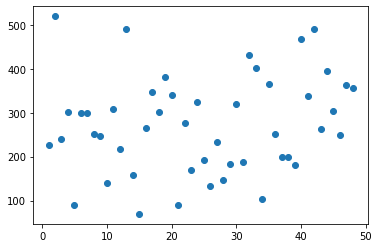

In [15]:
from matplotlib import pyplot as plt
plt.scatter(by_user.index, by_user['Charge Duration in Seconds']/3600)
plt.show()


In [16]:
by_user['Charge Duration in Seconds'] = by_user['Charge Duration in Seconds']/3600

In [17]:
by_user.head()

,Charge Duration in Seconds
User,
1,226.037222
2,519.366667
3,240.069444
4,301.338333
5,90.379444


In [18]:
c= 0
co2_per_user = []
for index, row in by_user.iterrows():
    co2_per_user.append(row['Charge Duration in Seconds']*3.466)

In [19]:
co2_per_user

[783.4450122222223,
 1800.1248666666668,
 832.0806944444446,
 1044.4386633333334,
 313.2551544444445,
 1033.6247433333333,
 1034.5865583333334,
 871.955098888889,
 858.4858377777778,
 487.86453222222224,
 1071.4763516666667,
 753.898325,
 1696.6406972222221,
 548.3067583333334,
 241.36261222222223,
 916.1138644444445,
 1199.748197777778,
 1044.3905244444445,
 1324.0697666666667,
 1181.763508888889,
 308.0253455555556,
 959.2915594444445,
 590.043175,
 1120.0003516666666,
 667.70757,
 464.57012388888893,
 809.9993861111112,
 511.9089444444445,
 636.2728755555556,
 1105.5692755555556,
 654.6860005555556,
 1497.9560983333333,
 1393.3291116666667,
 355.44311388888894,
 1268.1824422222223,
 872.7407255555556,
 686.5703122222222,
 686.3758311111111,
 626.2725027777777,
 1621.6056483333334,
 1172.5660927777778,
 1698.6625305555556,
 910.089763888889,
 1366.1922572222222,
 1055.1909655555555,
 860.6713433333333,
 1257.9182683333333,
 1236.8690577777777]

In [20]:
co2_per_user = pd.DataFrame(co2_per_user)

In [21]:
co2_per_user.columns = ['Co2 Emission']

In [22]:
co2_per_user


,Co2 Emission
0,783.445012
1,1800.124867
2,832.080694
3,1044.438663
4,313.255154
5,1033.624743
6,1034.586558
7,871.955099
8,858.485838
9,487.864532


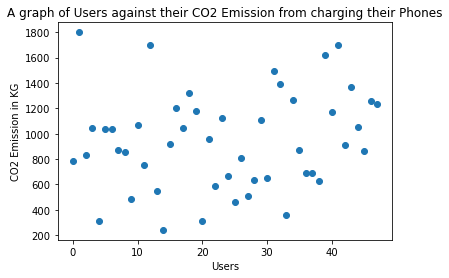

In [23]:
plt.scatter(co2_per_user.index, co2_per_user['Co2 Emission'])

plt.title('A graph of Users against their CO2 Emission from charging their Phones')
plt.xlabel('Users')
plt.ylabel('CO2 Emission in KG')

plt.savefig('user-wise emission from charging_scatter.jpg')
plt.show()

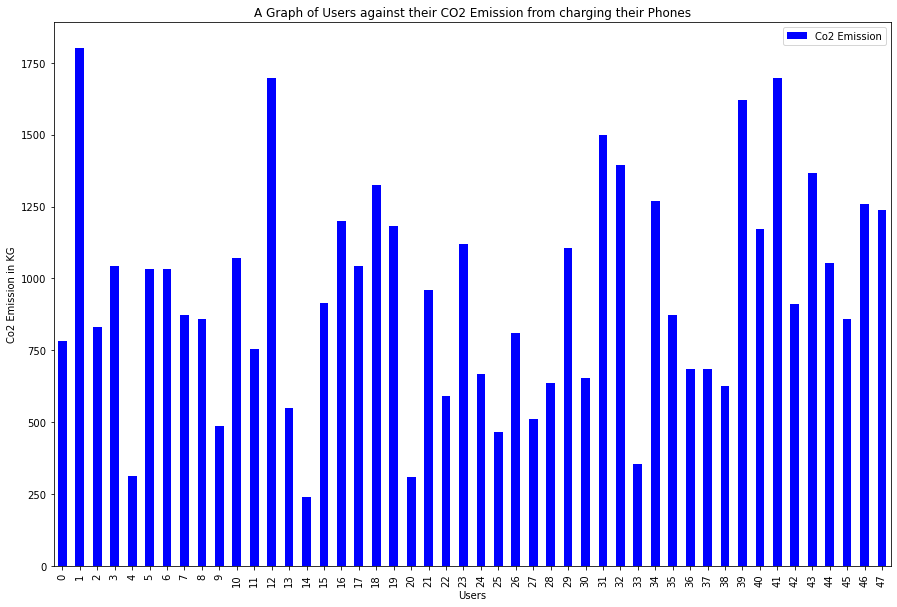

In [24]:
myplot = co2_per_user.plot(figsize=(15, 10), kind='bar', rot=90, color = "blue", title = "A Graph of Users against their CO2 Emission from charging their Phones")
#myplot.figure(figsize=(3, 3))
myplot.set_xlabel("Users")
myplot.set_ylabel("Co2 Emission in KG")
plt.savefig('user-wise emission from charging.jpg')


In [25]:
co2_per_user.describe()

,Co2 Emission
count,48.000000
mean,946.507134
std,383.189936
min,241.362612
25%,664.452178
50%,913.101814
75%,1186.259681
max,1800.124867


In [26]:
co2_per_user_per_year = (co2_per_user*52)/10

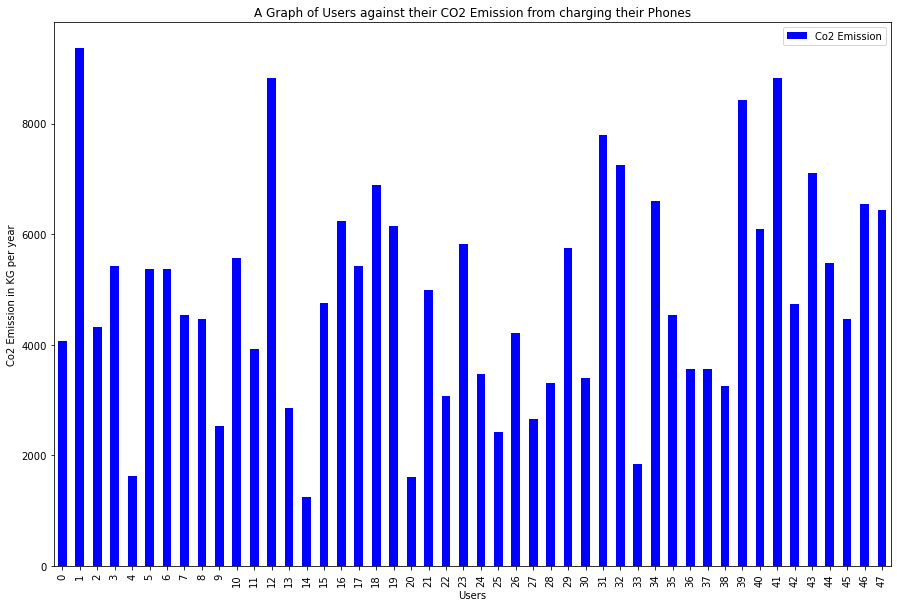

In [30]:
myplot = co2_per_user_per_year.plot(figsize=(15, 10), kind='bar', rot=90, color = "blue", title = "A Graph of Users against their CO2 Emission from charging their Phones")
#myplot.figure(figsize=(3, 3))
myplot.set_xlabel("Users")
myplot.set_ylabel("Co2 Emission in KG per year")
plt.savefig('user-wise emission from charging per year.jpg')

<AxesSubplot:>

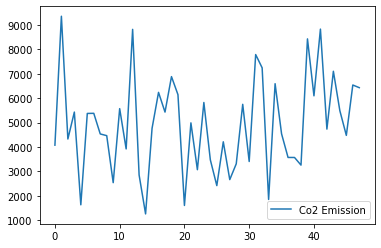

In [31]:
co2_per_user_per_year.plot()

In [33]:
from sklearn.cluster import KMeans


In [58]:
co2_per_user['User'] = co2_per_user.index

In [59]:
co2 = co2_per_user.to_numpy()

In [35]:
kmeans = KMeans(n_clusters =3)

In [63]:
kmeans.fit(co2)

KMeans(n_clusters=3)

In [64]:
clusters = kmeans.cluster_centers_

In [65]:
print(clusters)

[[1020.88326199   22.5       ]
 [ 533.28519858   23.1875    ]
 [1549.82262208   27.125     ]]


In [67]:
y_km = kmeans.fit_predict(co2)

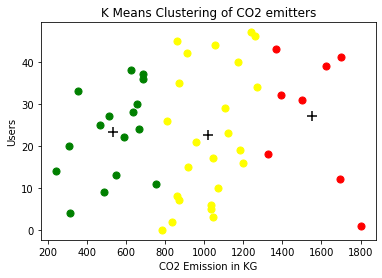

In [80]:
plt.scatter(co2[y_km == 0,0],co2[y_km==0,1],s=50,color='yellow')
plt.scatter(co2[y_km == 1,0],co2[y_km==1,1],s=50,color='green')
plt.scatter(co2[y_km == 2,0],co2[y_km==2,1],s=50,color='red')
plt.scatter(clusters[0][0],clusters[0][1],marker='+', s=100,color='black')
plt.scatter(clusters[1][0],clusters[1][1],marker='+', s=100,color='black')
plt.scatter(clusters[2][0],clusters[2][1],marker='+', s=100,color='black')
plt.title('K Means Clustering of CO2 emitters')
plt.xlabel('CO2 Emission in KG')
plt.ylabel('Users')

#plt.savefig('K-Means Clustering_From Phone charge.jpg')
plt.show()